In [1]:
import pandas as pd
import numpy as np
import yfinance as yf

# https://analyzingalpha.com/yfinance-python

In [2]:
goog = yf.Ticker('goog')
data = goog.history()
data.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-03-17 00:00:00-04:00,100.839996,103.489998,100.750000,102.459999,76109100,0.0,0.0
2023-03-20 00:00:00-04:00,101.059998,102.580002,100.790001,101.930000,26033900,0.0,0.0
2023-03-21 00:00:00-04:00,101.980003,105.959999,101.860001,105.839996,33122800,0.0,0.0
2023-03-22 00:00:00-04:00,105.139999,107.510002,104.209999,104.220001,32240300,0.0,0.0
2023-03-23 00:00:00-04:00,105.889999,106.980003,105.410004,106.739998,4781070,0.0,0.0


<Axes: xlabel='Date', ylabel='Open'>

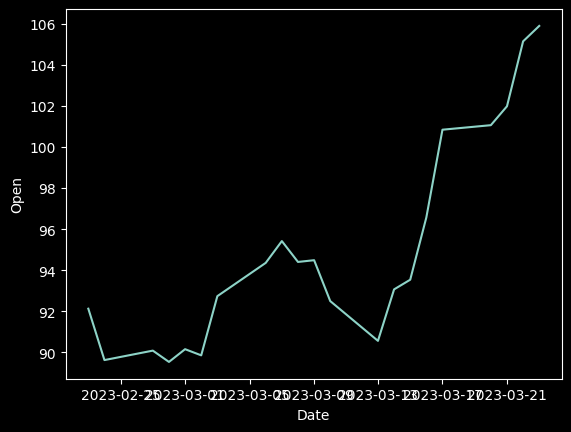

In [3]:
import seaborn as sns

sns.lineplot(x="Date", y="Open", data=data)

---
## I need all companies from SP500

### Use Pandas to get the table from wikipedia (Beautifulsoup for web scrapping is using in backend)

---

In [5]:
import os 

path = './data/'
isExist = os.path.exists(path+'sp500list.csv')

want_save = True

if isExist:
    sp500 = pd.read_csv('./data/sp500list.csv')
else:
    url =  'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
    sp500_all = pd.read_html(url)
    sp500 = sp500_all[0]

    if want_save:
        # Save
        os.makedirs(path)
        sp500.to_csv(path+'sp500list.csv', index=False)
    

---
### Get data from yfinance

---